### Series of Newman Exercises on Random Motion
These are two Newman Exercises which explore Brownian Motion and DLA distribuition which is an extension of Brownian Motion. They are motions that stem from at pseudorandom number generator. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Exercise 10.3 Brownian Motion
Brownian Motion is the motion of a particle in a gas where random collisions with gas particles determine the motion of the particle. It's best modeled with a random number generator that determines the new direction

In [2]:

#################################################################
# This program simulates Brownian motion in the presence of walls
# Note that the physical behaviour would be to stick to walls,
# which is the purpose of Q1a.
# Author: Nico Grisouard, University of Toronto
# Date: 14 November 2018
#################################################################
def nextmove(x, y):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    direction =  np.random.randint(1,5)
    if direction == 1:  # move up
        y += 1
    elif direction == 2:  # move down
        y -= 1
    elif direction == 3:  # move right
        x += 1
    elif direction == 4:  # move left
        x -= 1
    else:
        print("error: direction isn't 1-4")
    if x == 100 :
        x -= 1
    elif y == 100 :
        y -= 1
    elif x == 0:
        x += 1
    elif y == 0:
        y += 1
    return x, y

# %% main program starts here ------------------------------------------------|
# YOU NEED TO FINISH IT!
plt.ion()

Lp = 101  # size of domain
Nt = 5000  # number of time steps
# arrays to record the trajectory of the particle
x_position = np.empty(Nt)
y_position = np.empty(Nt)
# COMPLETE

centre_point = (Lp-1)//2  # middle point of domain
x_position[0] = centre_point
y_position[0] = centre_point
for i in range(Nt-1):
    x_position[i+1],y_position[i+1] = nextmove(x_position[i],y_position[i])
    #print(x_position[i],y_position[i])
    # AND OFF YOU GO!


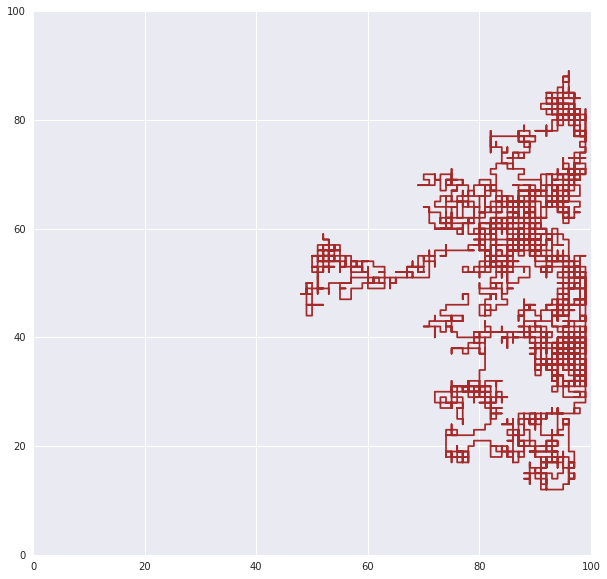

In [3]:
plt.figure(figsize = (10,10))    
plt.plot(x_position, y_position, c = 'brown')
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

### Exercise 10.13
Diffusion Limited aggregation is the clustering of particles that were undergoing Brownian Motion until they connected to one another.  

In [42]:
def nextmove(x, y):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    direction =  np.random.randint(1,5)
    if direction == 1:  # move up
        y += 1
    elif direction == 2:  # move down
        y -= 1
    elif direction == 3:  # move right
        x += 1
    elif direction == 4:  # move left
        x -= 1
    else:
        print("error: direction isn't 1-4")
    return x, y


In [43]:
x_particle_list = []
y_particle_list = []
Lp = 101  # size of domain
# arrays to record the trajectory of the particle
centre_point = (Lp-1)//2  # middle point of domain
x_position = np.array([centre_point])
y_position = np.array([centre_point])
i = 0
j = 0

In [44]:

while i <= 100:   # number of particle count
    new_particle = False
    x_fill,y_fill = nextmove(x_position[j],y_position[j])
    #print(x_fill,y_fill)
    if x_fill == Lp-1 or y_fill == Lp-1 or x_fill == 0 or y_fill == 0:
       # print('hit a wall')
        new_particle = True  
    for i in range(len(x_particle_list)):    # testing if particle hits one
        particle_position = np.array([x_fill,y_fill])
        end_x_array = x_particle_list[i]
        end_y_array = y_particle_list[i]
        rest_position = np.array([end_x_array[-1], end_y_array[-1]])
        if np.array_equal(particle_position, rest_position) == True:
         #   print('hit a particle')
            new_particle = True
    j += 1
    if new_particle == True:
       # print('generated new particle')
        # generate a new particle
        x_particle_list.append(x_position)
        y_particle_list.append(y_position)
        x_position = np.array([centre_point])
        y_position = np.array([centre_point])
        #print(len(x_position))
        j = 0
        i+= 1
    else:  
        x_position =  np.append(x_position,x_fill)
        y_position =  np.append(y_position,y_fill)
    # AND OFF YOU GO!

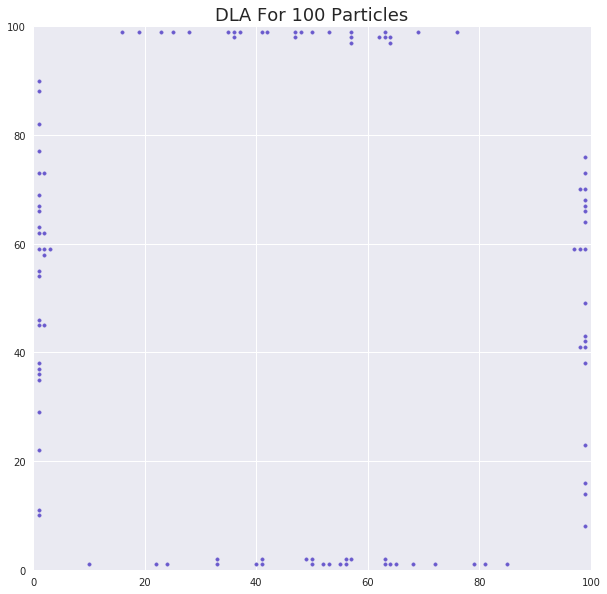

In [45]:
plt.figure(figsize = (10,10))  
plt.ylim(0,Lp-1)
plt.xlim(0,Lp-1)
plt.title('DLA For 100 Particles', fontsize = '18')
for j in range(len(x_particle_list)):
    x_rest = x_particle_list[j]
    y_rest = y_particle_list[j]
    plt.scatter(x_rest[-1],y_rest[-1],marker = ".", c = 'slateblue')
plt.show()

In [7]:
x_particle_list = []
y_particle_list = []
Lp = 11
Lp = 151  # size of domain
# arrays to record the trajectory of the particle
centre_point = (Lp-1)//2  # middle point of domain
x_position = np.array([centre_point])
y_position = np.array([centre_point])
i = 0
j = 0
centre_full = False

In [ ]:

while centre_full == False:  # testing if centre point is full
    new_particle = False
    x_fill,y_fill = nextmove(x_position[j],y_position[j])
    #print(x_fill,y_fill)8
    if x_fill == Lp-1 or y_fill == Lp-1 or x_fill == 0 or y_fill == 0:
       # print('hit a wall')
        new_particle = True  
    for i in range(len(x_particle_list)):
        particle_position = np.array([x_fill,y_fill])
        end_x_array = x_particle_list[i]
        end_y_array = y_particle_list[i]
        rest_position = np.array([end_x_array[-1], end_y_array[-1]])
        if np.array_equal(particle_position, rest_position) == True:
         #   print('hit a particle')
            new_particle = True
            print(particle_position)
            if np.array_equal(particle_position, np.array([centre_point,centre_point])) == True:
                centre_full = True
            # finishing the average
    j += 1
    if new_particle == True:
       # print('generated new particle')
        # generate a new particle
        x_particle_list.append(x_position)
        y_particle_list.append(y_position)
        x_position = np.array([centre_point])
        y_position = np.array([centre_point])
        #print(len(x_position))
        j = 0
        i+= 1
    else:  
        x_position =  np.append(x_position,x_fill)
        y_position =  np.append(y_position,y_fill)
    # AND OFF YOU GO!

In [ ]:
plt.figure(figsize = (10,10))  
plt.ylim(0,Lp-1)
plt.xlim(0,Lp-1)
plt.title('DLA Until Full', fontsize = '18')
for j in range(len(x_particle_list)):
    x_rest = x_particle_list[j]
    y_rest = y_particle_list[j]
    plt.scatter(x_rest[-1],y_rest[-1],marker = ".", c = 'slateblue')
plt.show()